## 천재교육_2기_이윤섭

### <선택 분석 1번>
* 상품별 분석
    - 최대 매출 상품 3가지를 집계한다 
    - 주문연도에 따라 해당 상품의 매출 증감을 통계적으로 확인한다

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df=pd.read_excel('./미니프로젝트-쇼핑몰 실습데이터.xlsx')
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [3]:
list3=[]
for i in df['상품명'].unique():
    m=df['상품명']==i
    temp=df[m]
    x=temp['판매금액'].sum()
    list3.append([i,x])
pd.DataFrame(list3)
a=pd.DataFrame(list3)
a

,0,1
0,eHBM셀파수학교실 비닐봉투-1세트 100장입,6765000
1,eHBM셀파수학교실 삼색볼펜-1세트 50개입,1935000
2,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,1800000
3,eHBM셀파수학교실-학습계통도(중등 5종),58500
4,"eHBM셀파수학교실 종이컵-1박스 1,000개입",2992000
...,...,...
13248,[이디야] 비니스트 마일드 80+20입,13700
13249,[학생선물] 3000 우주 마블 슬라임,2550
13250,[학생선물] 깜짝 주사위게임,8000
13251,[학생선물] 동물 메모리 게임,8000


In [4]:
a.sort_values(by=[1],ascending=False).head(20)

,0,1
8075,[스마트 HBE] 학습 전용 태블릿-일반결제,965844000
2840,[신세계] 신세계 상품권-4만원권,896793600
10027,[지사전용] 스마트 HBE-학습 전용 태블릿-후불,622908000
6902,[스마트 HBE] 학습 전용 태블릿-정기결제,561132000
3258,[스마트 HBE] 학습 전용 태블릿(정기결제),466488000
10026,[지사전용] 스마트 HBM-학습 전용 태블릿-후불,458964000
4164,[명절상품권특가] 신세계 상품권 교환권-4만원권,424943400
2575,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),375168000
8660,[스마트 HBM] 학습 전용 태블릿-일반결제,344916000
3259,[스마트 HBM] 학습 전용 태블릿(정기결제),312048000


In [5]:
def center_name(x):
    if any([i in x for i in ['[스마트 HBE] 학습 전용 태블릿-일반결제','[신세계] 신세계 상품권-4만원권','[지사전용] 스마트 HBE-학습 전용 태블릿-후불']]):
        return True
    return False

In [6]:
df['상품명']=df['상품명'].apply(lambda x: str(x))

In [7]:
df['상품명_상위권'] = df['상품명'].apply(lambda x: center_name(x))

In [8]:
a = df[df['상품명_상위권']]

In [9]:
a=a.reset_index()
a=a.drop(['index'],axis='columns')

In [10]:
a['주문일자']=a['주문일자'].apply(lambda x: int(str(x).split('-')[0]))

In [11]:
m0=a['주문일자']==2020
m1=a['주문일자']==2021
m2=a['주문일자']==2022

In [12]:
am0=a[m0]
am1=a[m1]
am2=a[m2]

In [13]:
list3=[]
for i in am0['상품명'].unique():
    m=am0['상품명']==i
    temp=am0[m]
    x=temp['판매금액'].sum()
    list3.append([i,x])
pd.DataFrame(list3)
a1=pd.DataFrame(list3)
a1

,0,1
0,[신세계] 신세계 상품권-4만원권,2265600


In [14]:
a1['연도']=2020

In [15]:
list3=[]
for i in am1['상품명'].unique():
    m=am1['상품명']==i
    temp=am1[m]
    x=temp['판매금액'].sum()
    list3.append([i,x])
pd.DataFrame(list3)
a2=pd.DataFrame(list3)
a2

,0,1
0,[신세계] 신세계 상품권-4만원권,254630400
1,[스마트 HBE] 학습 전용 태블릿-일반결제,194040000


In [16]:
a2['연도']=2021

In [17]:
list3=[]
for i in am2['상품명'].unique():
    m=am2['상품명']==i
    temp=am2[m]
    x=temp['판매금액'].sum()
    list3.append([i,x])
pd.DataFrame(list3)
a3=pd.DataFrame(list3)
a3

,0,1
0,[스마트 HBE] 학습 전용 태블릿-일반결제,771804000
1,[신세계] 신세계 상품권-4만원권,639897600
2,[지사전용] 스마트 HBE-학습 전용 태블릿-후불,622908000


In [18]:
a3['연도']=2022

In [19]:
a=pd.concat([a1,a2,a3],axis=0)

In [20]:
a.columns = ['상품명', '판매금액(단위:억)', '연도']

In [21]:
a['판매금액(단위:억)'].apply(lambda x: x/100000000)

0    0.022656
0    2.546304
1    1.940400
0    7.718040
1    6.398976
2    6.229080
Name: 판매금액(단위:억), dtype: float64

In [22]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

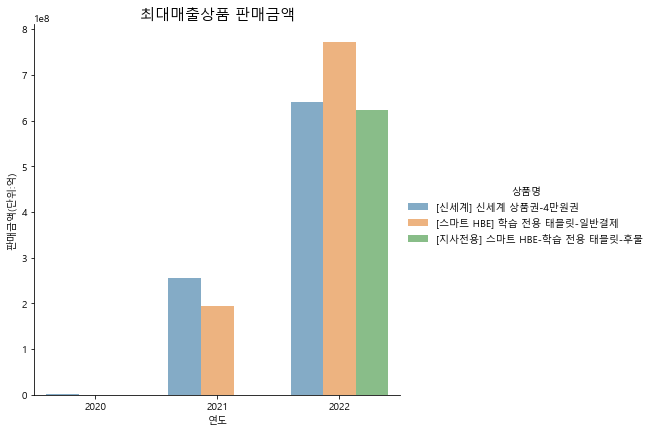

In [23]:
import seaborn as sns

g = sns.catplot(
    data=a, kind="bar",
    x="연도", y="판매금액(단위:억)", hue='상품명', alpha=.6, height=6)
plt.title('최대매출상품 판매금액', fontsize=15)
plt.savefig('./fig11.jpg',dpi=700)